In [16]:
#Import Modules 
import os 
import csv 
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import scipy.stats as sts
import numpy as np


# Import API key
from api_key import g_key
#import gmaps

In [17]:
#Open Wine File 
csv_path = '../Resources/winemag-data.csv'

In [18]:
#Read wine data 
wine_data_pd = pd.read_csv(csv_path)

#Cleaning Data 
#droping wines with missing values in 'price', 'region_1','designation','points','price','title','description','variety'
clean_data_pd = wine_data_pd.drop(['taster_name', 'taster_twitter_handle'], axis=1)
clean_data_pd = clean_data_pd.dropna(subset=['price', 'region_1','designation','points','price','title','description','variety'])
clean_data_pd.drop(['Unnamed: 0'], axis=1)

,country,description,designation,points,price,province,region_1,region_2,title,variety,winery
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam
...,...,...,...,...,...,...,...,...,...,...,...
129959,France,The granite soil of the Brand Grand Cru vineya...,Brand Grand Cru,90,57.0,Alsace,Alsace,NaN,Cave de Turckheim 2010 Brand Grand Cru Pinot G...,Pinot Gris,Cave de Turckheim
129962,Italy,"Blackberry, cassis, grilled herb and toasted a...",Sàgana Tenuta San Giacomo,90,40.0,Sicily & Sardinia,Sicilia,NaN,Cusumano 2012 Sàgana Tenuta San Giacomo Nero d...,Nero d'Avola,Cusumano
129965,France,"While it's rich, this beautiful dry wine also ...",Seppi Landmann Vallée Noble,90,28.0,Alsace,Alsace,NaN,Domaine Rieflé-Landmann 2013 Seppi Landmann Va...,Pinot Gris,Domaine Rieflé-Landmann
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser


In [19]:
#We want to compare original data to cleaned data - to ensure we didnt skew the results 
#by too much so we can use a .describe() to view a summary statistics table
wine_data_pd.describe().drop(['Unnamed: 0'], axis=1)


,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [20]:
#Compare clean data statistics to old data statistics
clean_data_pd.describe().drop(['Unnamed: 0'], axis=1)

,points,price
count,70175.000000,70175.000000
mean,88.806341,39.559017
std,3.061324,35.729358
min,80.000000,4.000000
25%,87.000000,20.000000
50%,89.000000,30.000000
75%,91.000000,49.000000
max,100.000000,2013.000000


We can see that there was not too much change in the statistical data of our new DF as compared to our OG. Minor differences include standard deviation of price is lower, and our percentiles have shifted upwards by a couple of dollars in price. Lastly the largest difference is the max price of our data leaving us with a less expensive wine at 2,013 vs 3300 dollars in our original data.

In [21]:
blended_wines = clean_data_pd.dropna()

In [22]:
#find data of wine with only 1 region - typically considered a non_blended wine
non_blended = clean_data_pd[clean_data_pd['region_2'].isnull()]

In [23]:
clean_data_pd["price"].max()

2013.0

The r-squared is : 0.2138253489337102


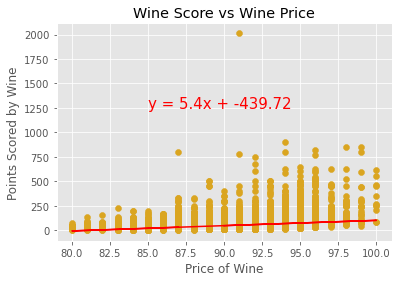

In [24]:
#create a scatter plot to view relationship between wine score and wine price
x_values = clean_data_pd["points"]
y_values = clean_data_pd["price"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.style.use('ggplot')
plt.scatter(x_values,y_values,facecolor='goldenrod')
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(85,1250), fontsize=15, color="red")
plt.title("Wine Score vs Wine Price")
plt.xlabel("Price of Wine")
plt.ylabel("Points Scored by Wine")
print(f"The r-squared is : {rvalue**2}")


It seems that there is no relationship between the proportion of variance in wine score and variance in wine price. We can see the rvalue measures around 21% when we do a linear regression. Because of this data, we can conclude that a higher price point doesn't directly mean the quality and rating of the wine is going to be higher. You can also see that the graph plots quite a few 100 point-scoring-wines at a fairly low price point.

In [89]:
#create bins for wine scores:
# 95-100 Classic: a great wine
# 90-94 Outstanding: a wine of superior character and style
# 85-89 Very good: a wine with special qualities
# 80-84 Good: a solid, well-made wine
# 75-79 Mediocre: a drinkable wine that may have minor flaws
# 50-74 Not recommended

bins = [0,74,79,84,89,94,100]
group_names = ["50-74 Not recommended",
               "75-79 Mediocre: a drinkable wine that may have minor flaws",
               "80-84 Good: a solid, well-made wine",
               "85-89 Very good: a wine with special qualities",
               "90-94 Outstanding: a wine of superior character and style",
               "95-100 Classic: a great wine"]


In [270]:
clean_data_pd["Wine Score"] =pd.cut(clean_data_pd["points"],bins, 
                                    labels=group_names, include_lowest=True)
wine_score_bins = clean_data_pd.groupby("Wine Score").count()
wine_score_bins[["variety"]]

,variety
Wine Score,
50-74 Not recommended,0
75-79 Mediocre: a drinkable wine that may have minor flaws,0
"80-84 Good: a solid, well-made wine",5642
85-89 Very good: a wine with special qualities,34565
90-94 Outstanding: a wine of superior character and style,28416
95-100 Classic: a great wine,1552


In [86]:
clean_data_pd["points"].min()

80

19563      80
86711      80
86712      80
14343      80
14342      80
         ... 
345       100
39286     100
118058    100
45781     100
111754    100
Name: points, Length: 70175, dtype: int64

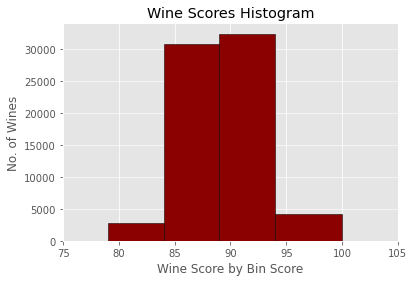

In [93]:
x = clean_data_pd["points"]
score_min = clean_data_pd["points"].min()

plt.style.use('ggplot')
plt.hist(x, bins =(bins),facecolor='darkred',edgecolor='black')
plt.grid(axis='y', alpha=0.75)
plt.xlim(75,105)
plt.xlabel('Wine Score by Bin Score')
plt.ylabel('No. of Wines')
plt.title('Wine Scores Histogram')
#plt.xticks([1,2,3,4],["80-84 Good","85-89 Very good","90-94 Outstanding","95-100 Classic"])
x.sort_values()

Notice there are no wines that scored lower than 80 points

In [29]:
#Which were the wines that scored so high, and what can we observe about them?
best_wine_by_score = clean_data_pd.loc[clean_data_pd["Wine Score"] == "95-100 Classic: a great wine"]
best_wine_by_score.describe()

,Unnamed: 0,points,price
count,1552.000000,1552.000000,1552.000000
mean,68850.943943,95.580541,114.065077
std,36993.083647,0.962191,101.686388
min,345.000000,95.000000,20.000000
25%,39299.750000,95.000000,59.000000
50%,75952.500000,95.000000,80.000000
75%,99315.250000,96.000000,125.000000
max,128683.000000,100.000000,850.000000


What is driving price point? If clearly wine score is not related to the price.

We can take a look at the highest priced wines and see if we can find realtionships from the wines to the regions?

In [104]:
#create bins for price segments by wine industry standard
price_bins = [0,4,10,15,20,30,50,100,200,3000]
price_group_names = ["EXTREME VALUE <$4","VALUE $4-$10",
                     "POPULAR PREMIUM $10-$15","PREMIUM $15-$20",
                     "SUPER PREMIUM $20-$30","ULTRA PREMIUM $30-$50",
                     "LUXURY $50-$100","SUPER LUXURY $100-$200","ICON $200 +"]
clean_data_pd["Wine Price Segments"] =pd.cut(clean_data_pd["price"],price_bins, 
                                             labels=price_group_names, include_lowest=True)
group = clean_data_pd.groupby('Wine Price Segments')
wine_price_bins = clean_data_pd.groupby("Wine Price Segments").count()
wine_price_bins[["variety"]]


,variety
Wine Price Segments,
EXTREME VALUE <$4,5
VALUE $4-$10,2048
POPULAR PREMIUM $10-$15,8072
PREMIUM $15-$20,10332
SUPER PREMIUM $20-$30,15389
ULTRA PREMIUM $30-$50,19448
LUXURY $50-$100,12407
SUPER LUXURY $100-$200,2102
ICON $200 +,372


In [138]:
#find the most expensive wine by country
most_expensive_wine = clean_data_pd.loc[clean_data_pd["Wine Price Segments"]=="ICON $200 +"]
most_expensive_wine_count = most_expensive_wine['country'].value_counts()
most_expensive_wine_count = pd.DataFrame(most_expensive_wine_count)
most_expensive_wine_count = most_expensive_wine_count.reset_index()
most_expensive_wine_count = most_expensive_wine_count.rename(columns={'index':'country','country':'count'})
most_expensive_wine_count

,country,count
0,France,125
1,Italy,103
2,US,84
3,Spain,37
4,Australia,18
5,Argentina,5


<BarContainer object of 6 artists>

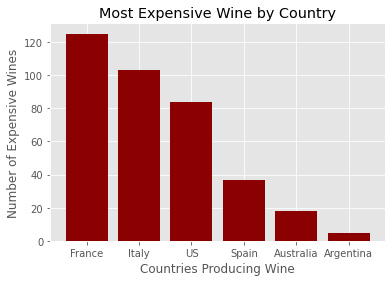

In [162]:
x_axis = most_expensive_wine_count["country"]
y_axis = most_expensive_wine_count['count']

plt.title("Most Expensive Wine by Country")
plt.ylabel("Number of Expensive Wines")
plt.xlabel("Countries Producing Wine")

plt.bar(x_axis,y_axis,color="darkred")

In [238]:
expensive_french_wine = most_expensive_wine.loc[most_expensive_wine["country"]=="France"]
expensive_italian_wine = most_expensive_wine.loc[most_expensive_wine["country"]=="Italy"]
expensive_us_wine = most_expensive_wine.loc[most_expensive_wine["country"]=="US"]
expensive_spanish_wine = most_expensive_wine.loc[most_expensive_wine["country"]=="Spain"]
# expensive_french_wine_count = expensive_french_wine["province"].value_counts()
# expensive_french_wine_count= pd.DataFrame(expensive_french_wine_count)

# expensive_french_wine_count = expensive_french_wine_count.reset_index()
# expensive_french_wine_count = expensive_french_wine_count.rename(columns={'index':'province','province':'count'})
# expensive_french_wine_count

In [240]:
expensive_us_wine["variety"].unique()
most_us_variety_amount = len(expensive_us_wine["variety"].unique())

expensive_italian_wine["variety"].unique()
most_italian_variety_amount = len(expensive_italian_wine["variety"].unique())

expensive_french_wine["variety"].unique()
most_french_variety_amount = len(expensive_french_wine["variety"].unique())

expensive_spanish_wine["variety"].unique()
most_spanish_variety_amount = len(expensive_spanish_wine["variety"].unique())



In [189]:
# province = expensive_french_wine_count["province"]
# x_axis = np.arange(len(province))
# y_axis = expensive_french_wine_count['count']

# plt.title("Most Expensive French Wines by Province")
# plt.ylabel("Province Count")
# plt.xlabel("French Provinces")

# plt.bar(x_axis,y_axis,color="darkred")
# tick_locations = [province for province in x_axis]
# plt.xticks(tick_locations, province, rotation="vertical")

In [191]:
# expensive_burgundy_french_wine = expensive_french_wine.loc[expensive_french_wine["province"]=="Burgundy"]
# expensive_burgundy_french_wine["region_1"].value_counts()

In [177]:
least_expensive_wine = clean_data_pd.loc[clean_data_pd["Wine Price Segments"]== "VALUE $4-$10"]
least_expensive_wine_df = least_expensive_wine["country"].value_counts()
least_expensive_wine_df = pd.DataFrame(least_expensive_wine_df)
least_expensive_wine_df = least_expensive_wine_df.reset_index()
least_expensive_wine_df = least_expensive_wine_df.rename(columns={'index':'country','country':'count'})
least_expensive_wine_df

,country,count
0,Spain,602
1,US,578
2,France,330
3,Italy,234
4,Argentina,218
5,Australia,86


<BarContainer object of 6 artists>

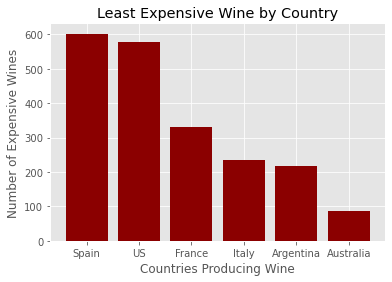

In [175]:
x_axis = least_expensive_wine["country"]
y_axis = least_expensive_wine['count']

plt.title("Least Expensive Wine by Country")
plt.ylabel("Number of Expensive Wines")
plt.xlabel("Countries Producing Wine")

plt.bar(x_axis,y_axis,color="darkred")

In [245]:
least_expensive_spanish_wine = least_expensive_wine.loc[least_expensive_wine["country"]=="Spain"]
least_expensive_us_wine = least_expensive_wine.loc[least_expensive_wine["country"]=="US"]
least_expensive_french_wine = least_expensive_wine.loc[least_expensive_wine["country"]=="France"]
least_expensive_italian_wine = least_expensive_wine.loc[least_expensive_wine["country"]=="Italy"]

In [246]:
least_expensive_spanish_wine["variety"].unique()
spanish_variety_amount = len(least_expensive_spanish_wine["variety"].unique())

least_expensive_us_wine["variety"].unique()
us_variety_amount = len(least_expensive_us_wine["variety"].unique())

least_expensive_french_wine["variety"].unique()
french_variety_amount = len(least_expensive_french_wine["variety"].unique())

least_expensive_italian_wine["variety"].unique()
italian_variety_amount = len(least_expensive_italian_wine["variety"].unique())


In [199]:
Most_Least_Variety_df

,French Variety,Spanish Variety
0,11,50


<ipython-input-217-7d34d3fe4db8>:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(count, explode = explode, colors=color, labels=labels, shadow=True, autopct ="%1.1f%%",startangle = 40)


([<matplotlib.patches.Wedge at 0x7f9a83f2b670>,
 [Text(0.3616655210446582, 1.1442019274968454, 'French Varieties'),
  Text(-0.33152682582485776, -1.0488517358323313, 'Spanish Varieties')],
 [Text(0.21097155394271727, 0.6674511243731597, '18.0%'),
  Text(-0.18083281408628601, -0.5721009468176352, '82.0%')])

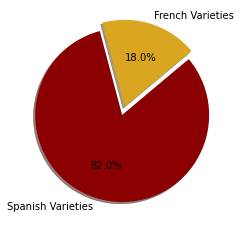

In [217]:
Most_Least_Variety = {"French Variety": [french_variety_amount],"Spanish Variety": [spanish_variety_amount]}
Most_Least_Variety_df = pd.DataFrame(Most_Least_Variety)

labels = ["French Varieties", "Spanish Varieties"]
count = Most_Least_Variety_df
color = ['goldenrod','darkred']
explode = (.1,0)

plt.pie(count, explode = explode, colors=color, labels=labels, shadow=True, autopct ="%1.1f%%",startangle = 40)


In [249]:
most_expensive_varieties = {"Most Expensive":{"France": most_french_variety_amount,"Italy": most_italian_variety_amount ,"US":most_us_variety_amount, "Spain": most_spanish_variety_amount}, "Least Expensive":{"Spain": spanish_variety_amount, "US":us_variety_amount,"France":french_variety_amount,"Italy":italian_variety_amount}}
most_expensive_varieties_df = pd.DataFrame(most_expensive_varieties)
most_expensive_varieties_df



,Most Expensive,Least Expensive
France,11,39
Italy,12,44
US,7,39
Spain,10,50


In [252]:
most_expensive_varieties_df = most_expensive_varieties_df.reset_index()
most_expensive_varieties_df

,level_0,index,Most Expensive,Least Expensive
0,0,France,11,39
1,1,Italy,12,44
2,2,US,7,39
3,3,Spain,10,50


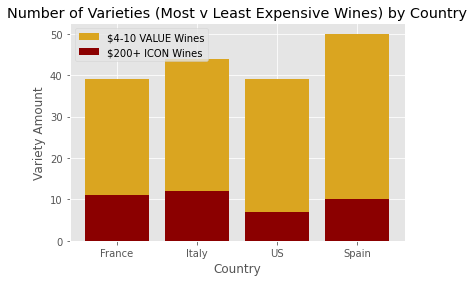

In [269]:
#create a scatter plot to view relationship between wine score and wine price
x_values = most_expensive_varieties_df["index"]
y_1_values = most_expensive_varieties_df["Most Expensive"]
y_2_values = most_expensive_varieties_df["Least Expensive"]


# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.style.use('ggplot')
# # plt.scatter(x_values,y_values,facecolor='goldenrod')
# plt.plot(x_values, regress_values, "r-")
# plt.annotate(line_eq,(85,1250), fontsize=15, color="red")
plt.title("Number of Varieties (Most v Least Expensive Wines) by Country")
plt.xlabel("Country")
plt.ylabel("Variety Amount")
# print(f"The r-squared is : {rvalue**2}")

plt.bar(x_values,y_2_values,color='goldenrod',label="$4-10 VALUE Wines")
plt.bar(x_values,y_1_values,color='darkred',label="$200+ ICON Wines")
plt.legend(loc='upper left')
plt.show()


In [273]:

# Add a wine year column
# Wine Years: Wine year was derived by searching for a 4 digit numeric value beginning with a "2".
#There are wine titles that include years prior to the year 2000. Based on additional analysis
# years prior to 2000 are not accurate with the exception of a 1947 and a 1945 year.
clean_data_pd['Wine Year'] = wine_data_pd['title'].str.extract(r'(2\d{3})(?=\s|$)')
clean_data_pd["counter"] = 1
clean_data_pd.head()

# clean_data_pd.dropna(inplace=True)
clean_data_pd.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,title,variety,winery,Wine Score,Wine Price Segments,Wine Year,counter
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,85-89 Very good: a wine with special qualities,POPULAR PREMIUM $10-$15,2013,1
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,85-89 Very good: a wine with special qualities,LUXURY $50-$100,2012,1
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,85-89 Very good: a wine with special qualities,POPULAR PREMIUM $10-$15,2011,1


In [290]:
by_year = clean_data_pd.groupby("Wine Year")
mean_price_by_year = by_year[["price"]].mean()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text major ticklabel objects>)

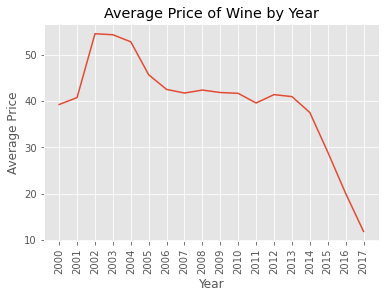

In [293]:
plt.plot(mean_price_by_year)
plt.title("Average Price of Wine by Year")
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.xticks(rotation="vertical")